In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib

# Load breast cancer dataset from correct path
breast_cancer = pd.read_csv(r"C:\Users\Ahsan\Downloads\archive (3)\data.csv")

# Display the first 5 rows
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
breast_cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

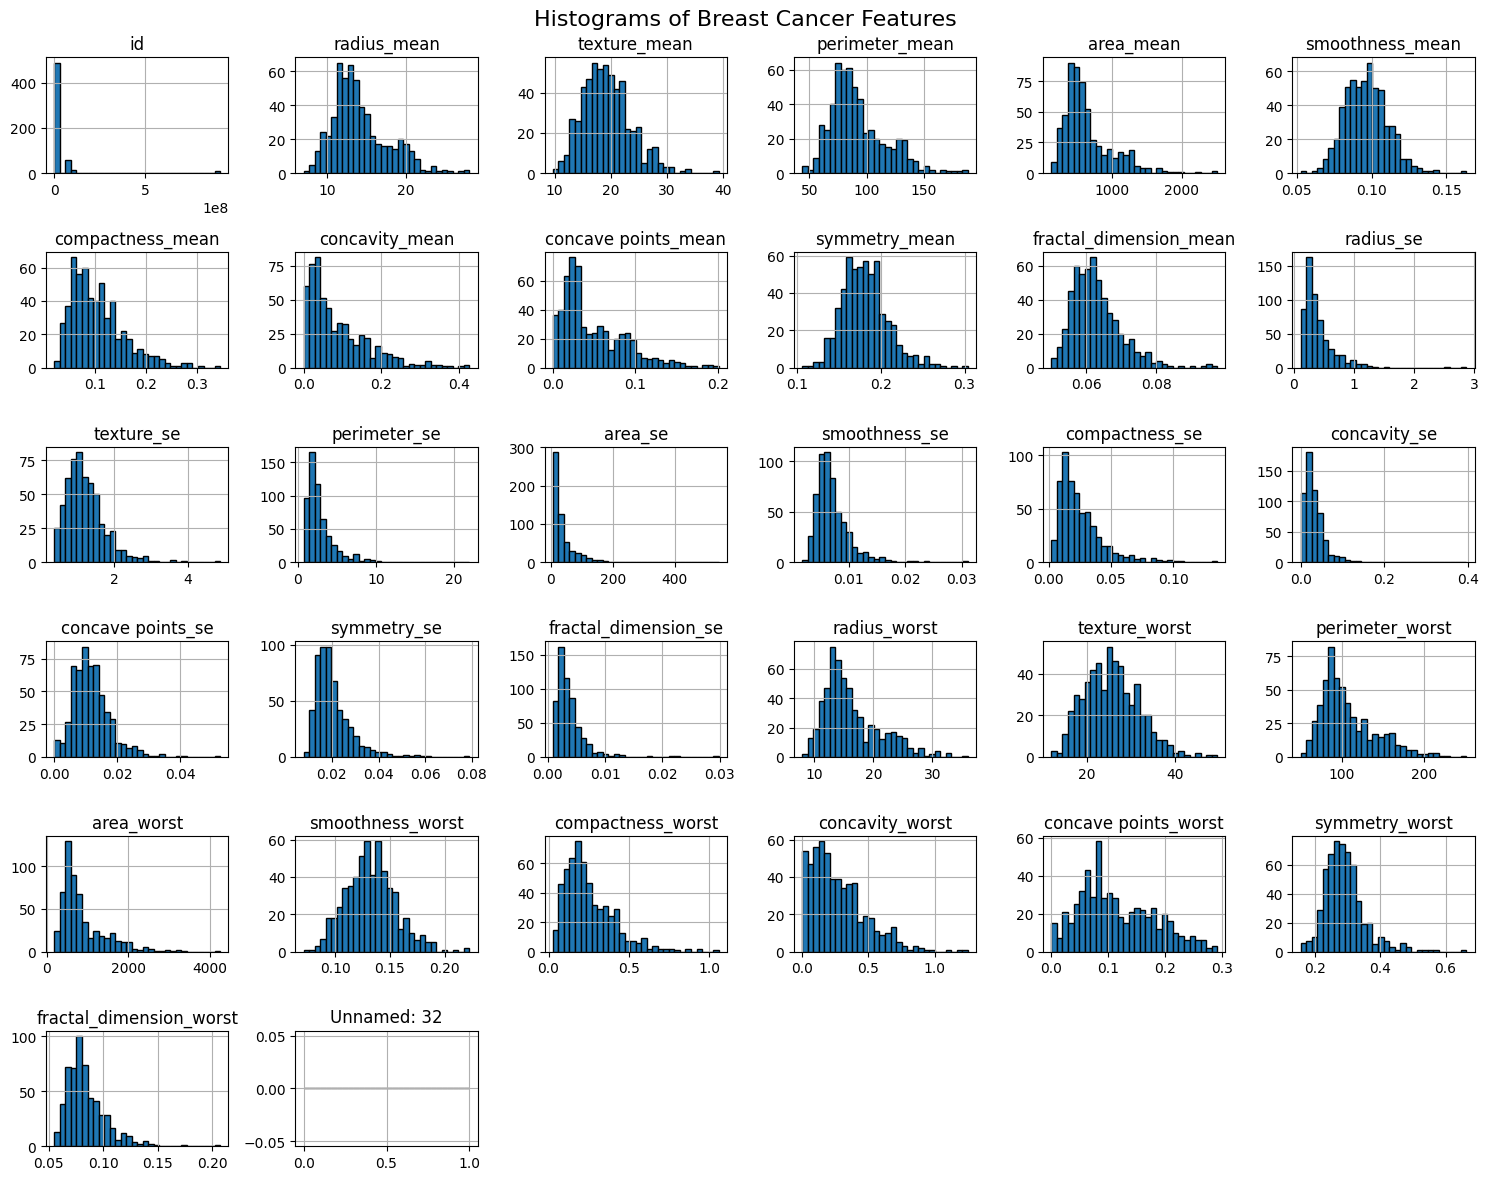

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for all numeric columns
breast_cancer.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Breast Cancer Features", fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
# Drop 'id' and 'Unnamed: 32' columns

breast_cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
print(breast_cancer.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
# Encode diagnosis: M = 1, B = 0
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})

# Check if encoding worked
print(breast_cancer['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [7]:
# Separate features and target
X = breast_cancer.drop('diagnosis', axis=1)  # All columns except 'diagnosis'
y = breast_cancer['diagnosis']    

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [9]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)



In [11]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                        
    scoring='accuracy',         
    n_jobs=-1,                 
    verbose=1
)

# Fit the grid search to training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9626373626373628


In [12]:
# Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [13]:
# Save the best model
joblib.dump(best_model, 'model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [14]:
# app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from PIL import Image
import warnings

warnings.filterwarnings("ignore")

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

# --- Page Setup ---
st.set_page_config(page_title="Breast Cancer Predictor", layout="wide", initial_sidebar_state="expanded")

# --- CSS Styling ---
st.markdown("""
    <style>
        .main-title {
            font-size: 36px;
            font-weight: bold;
            color: #6a1b9a;
            text-align: center;
        }
        .subheading {
            font-size: 18px;
            text-align: center;
            margin-bottom: 30px;
        }
        .result-success {
            color: #2e7d32;
            font-weight: bold;
        }
        .result-danger {
            color: #c62828;
            font-weight: bold;
        }
    </style>
""", unsafe_allow_html=True)

# --- Main Title ---
st.markdown('<div class="main-title">Breast Cancer Prediction Web App</div>', unsafe_allow_html=True)
st.markdown('<div class="subheading">Enter the tumor characteristics below to predict whether it is Malignant (1) or Benign (0).</div>', unsafe_allow_html=True)

# --- Sidebar: App Info + Portfolio ---
with st.sidebar:
    st.title("App Info")
    st.markdown("""
    - **Developer:** Naima Khan  
    - **Model:** Random Forest Classifier  
    - **Input:** 30 tumor features  
    - **Output:** 0 = Benign, 1 = Malignant  
    """)

    if st.button("About"):
        st.info("This AI-powered web app helps in the early detection of breast cancer using machine learning. Built with Python, Scikit-learn, and Streamlit.")

    st.markdown("---")
    st.subheader(" Developer Portfolio")

    # Optional profile picture
    # image = Image.open("your_photo.jpg")
    # st.image(image, width=150, caption="Naima Khan")

    st.markdown("""
    **Naima Khan**  
    AI Engineer & Machine Learning Enthusiast  
    Based in Pakistan 🇵🇰

    **Skills:**  
    - Python, Streamlit, Scikit-learn  
    - Machine Learning, Deep Learning  
    - Data Visualization, Pandas, NumPy

    **Projects:**  
    - [Credit Card Fraud Detection](#)  
    - [Wine Quality Classifier](#)  
    - [Customer Churn Prediction](#)  
    """)

    st.markdown(" **Connect with me:**")
    col1, col2 = st.columns(2)
    with col1:
        st.link_button("GitHub", "https://github.com/naima-khan")
    with col2:
        st.link_button("Facebook", "https://facebook.com/ajk.khan")

# --- Feature Names ---
feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# --- Input Form ---
with st.form("input_form"):
    st.subheader("Step 1: Input Tumor Feature Values")
    input_data = []
    cols = st.columns(3)
    for i, feature in enumerate(feature_names):
        with cols[i % 3]:
            value = st.number_input(f"{feature}", min_value=0.0, value=0.0, format="%.4f")
            input_data.append(value)

    submitted = st.form_submit_button("Step 2: Predict Tumor Type")

# --- Prediction ---
if submitted:
    try:
        input_array = np.array(input_data).reshape(1, -1)
        input_scaled = scaler.transform(input_array)
        prediction = model.predict(input_scaled)[0]
        proba = model.predict_proba(input_scaled)[0][prediction]

        result_text = "Malignant (1)" if prediction == 1 else "Benign (0)"
        result_color = "result-danger" if prediction == 1 else "result-success"

        st.markdown(f'<h3 class="{result_color}">Prediction: {result_text}</h3>', unsafe_allow_html=True)
        st.markdown(f'<p><strong>Model Confidence:</strong> {proba * 100:.2f}%</p>', unsafe_allow_html=True)

        with st.expander("View Your Input Data"):
            df = pd.DataFrame([input_data], columns=feature_names)
            st.dataframe(df.style.format("{:.4f}"))

    except Exception as e:
        st.error(f"An error occurred during prediction:\n\n{e}")






2025-07-03 18:01:51.817 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 18:01:51.819 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 18:01:53.353 
  command:

    streamlit run C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-03 18:01:53.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 18:01:53.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 18:01:53.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 18:01:53.366 Thread 'MainThread': missing ScriptRunContext! This warning can b